In [6]:
import experimenting
import event_library as el
import torch
from matplotlib import pyplot as plt
from experimenting.utils.visualization import plot_skeleton_2d, plot_skeleton_3d

In [55]:
hw = el.utils.get_hw_property('dvs')

In [56]:
core = experimenting.dataset.HumanCore('test', 'scripts/h3m/out/', 'scripts/h3m/out/3d_joints.npz', 'cross-subject', 1)

No handles with labels found to put in legend.


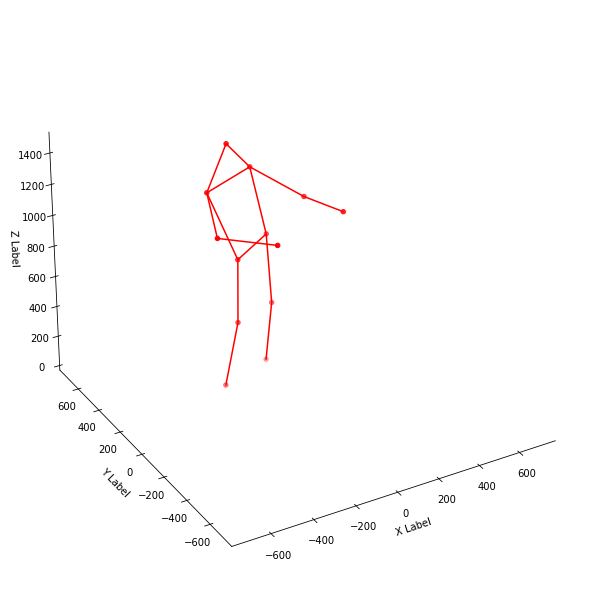

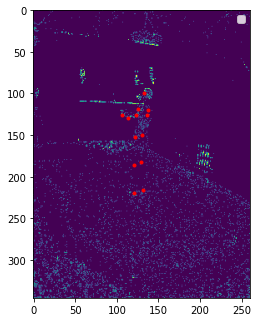

In [61]:
idx = 100
sk, intr, extr = core.get_joint_from_id(idx)
frame = core.get_frame_from_id(idx)
joints = sk.get_2d_points(260, 346, intrinsic_matrix=intr, extrinsic_matrix=extr)
plot_skeleton_3d(sk)
plot_skeleton_2d(frame.squeeze(), joints)